In [37]:
# Import packages
import os
import pandas as pd
from scipy.stats import linregress, spearmanr, fisher_exact,pearsonr
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Set working directory
os.chdir("/Users/rohankrishnamurthi/Downloads/Maalavika_Pillai_Research/Histone Mark Analysis Project")

In [39]:
ref = pd.read_table('TF_TSS_10kb_named.bed',
                   header = None, names = ['chr','start','end','Gene'])
ref['TSS'] = ref['start'] +10000

In [49]:
ref

,chr,start,end,Gene,TSS
0,chr1,1869,21869,DDX11L1,11869
1,chr1,4404,24404,WASH7P,14404
2,chr1,7369,27369,MIR6859-2,17369
3,chr1,19554,39554,MIR1302-10,29554
4,chr1,20366,40366,MIR1302-11,30366
...,...,...,...,...,...
57954,chrY,26539425,26559425,CYCSP49,26549425
57955,chrY,26576642,26596642,SLC25A15P1,26586642
57956,chrY,26584851,26604851,PARP4P1,26594851
57957,chrY,26616520,26636520,FAM58CP,26626520


In [40]:
files = os.listdir('intersections/')

In [42]:
#files

In [30]:
files_zero = [file for file in files if os.path.getsize('intersections/' + file) == 0]

In [45]:
files_relevant = [file for file in files if (os.path.getsize('intersections/' + file) != 0) and ".bed" in file]

In [46]:
for file in files_relevant:
    print(file)
    # Must add gene name to those intersection files
    # Maalavika has a folder with named files (same_named), in Histone_IP/Rohan
    # Intersect these with names files to obtain gene names

HepG2_RFX5_H3K27me3_intersection.bed
K562_MAZ_H3K27me3_intersection.bed
K562_REST_bivalency_intersection.bed
K562_EP300_H3K9me3_intersection.bed
MCF-7_HDAC2_H3K4me3_intersection.bed
HepG2_MYC_H3K4me3_intersection.bed
HepG2_RAD21_H3K27me3_intersection.bed
K562_RCOR1_H3K27Ac_intersection.bed
GM12878_HDAC2_H3K27Ac_intersection.bed
HepG2_MYC_H3K27me3_intersection.bed
GM12878_RAD21_bivalency_intersection.bed
K562_RFX5_H3K9me3_intersection.bed
K562_ESRRA_H3K4me3_intersection.bed
HepG2_HDAC2_H3K9me3_intersection.bed
HepG2_CTCF_H3K27me3_intersection.bed
GM12878_RFX5_bivalency_intersection.bed
MCF-7_ELK1_H3K4me3_intersection.bed
GM12878_CTCF_H3K9me3_intersection.bed
A549_HDAC2_H3K4me3_intersection.bed
MCF-7_MAZ_H3K4me3_intersection.bed
K562_MAFK_H3K27me3_intersection.bed
HepG2_HDAC2_H3K27me3_intersection.bed
MCF-7_REST_H3K4me3_intersection.bed
HepG2_REST_H3K27me3_intersection.bed
GM12878_MAX_H3K27Ac_intersection.bed
K562_MAZ_H3K27Ac_intersection.bed
A549_MAX_H3K4me3_intersection.bed
GM12878_MAZ

In [48]:
compiled_histone_df = pd.DataFrame()
for file in files_relevant:
    print(file) # to see what files succeed
    df = pd.read_table('intersections/' + file, header = None)
    df = df[df.columns[:3]]
    df.columns = ['chrom','start','end']
    df_named = pd.read_table('intersections/' + file, names = ['chrom','start','end','Gene'])
    df = df.merge(df_named, on = ['chrom','start','end'])
    df = df.merge(ref[['Gene','TSS']], on = 'Gene')
    
    #Estimate distance from TSS
    #df['start_diff'] =  df['start'] - df['TSS']
    #df['end_diff'] =  df['end'] - df['TSS']
    #df['min_dist'] = df.apply(lambda x: abs(sum([x['start_diff'], x['end_diff']])/2), axis =1)
    #df['Mark'] = file.split('_')[1]
    #df['TF'] = file.split('_')[2]
    #df['CellLine'] =  file.split('_')[0]
    
    #Compile data
    #compiled_histone_df = pd.concat([compiled_histone_df , df[['TF','Mark','Gene','min_dist', 'CellLine']]])

HepG2_RFX5_H3K27me3_intersection.bed


ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [43]:
#compiled_histone_df

In [85]:
compiled_histone_df.to_csv('Compiled_marks.csv')

In [6]:
compiled_histone_df=pd.read_csv('Compiled_marks.csv')

In [7]:
#Subselect K562 edges
K562_histone_df = compiled_histone_df.loc[compiled_histone_df.CellLine =='K562']

#Keep only the minimum distance mark
K562_histone_df = K562_histone_df.groupby(['TF','Gene','Mark'])['min_dist'].min().reset_index(name='min_dist')

K562_histone_df = K562_histone_df.pivot(index =['TF','Gene'], columns='Mark', values = 'min_dist')
K562_histone_df = K562_histone_df.reset_index()
K562_histone_df.fillna(np.inf, inplace = True)

## Extract RNAseq data

In [10]:
rnaseq = pd.read_csv('/projects/b1042/AmaralLab/Maalavika/CellLineSpecificNetworks/TFbindingModel/TF_ChIPfitv2/RNAseq/K562/Compiled_RNAseq.csv',index_col =0)
rnaseq.index = rnaseq.Gene
rnaseq= rnaseq.drop('Gene', axis =1).T

# Using jupyter on quest requires usage of a Northwestern VPN (Global Protect)
# https://services.northwestern.edu/TDClient/30/Portal/KB/ArticleDet?ID=1818

FileNotFoundError: [Errno 2] No such file or directory: '/projects/b1042/AmaralLab/Maalavika/CellLineSpecificNetworks/TFbindingModel/TF_ChIPfitv2/RNAseq/K562/Compiled_RNAseq.csv'

In [8]:
K562_edges = compiled_histone_df.loc[compiled_histone_df.CellLine =='K562'][['TF','Gene']]

#Select edges with RNA expression
K562_edges = K562_edges.loc[(K562_edges.TF.isin(rnaseq.columns)) & (K562_edges.Gene.isin(rnaseq.columns))]

#Calculate Corrlation for each edge
corr = [list(spearmanr(rnaseq[row['TF']],rnaseq[row['Gene']])) + 
        [row['TF'], row['Gene']] for idx,row in K562_edges.iterrows()]
corr =pd.DataFrame(corr, columns = ['Correlation','pval', 'TF', 'Gene'])

/home/mpf1405/.conda/envs/jupyter-kernel-py37/lib/python3.7/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


<AxesSubplot:>

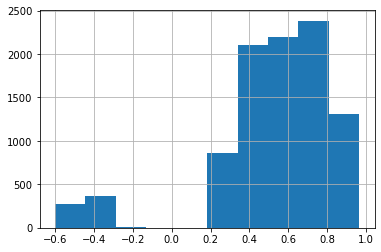

In [9]:
corr = corr.loc[corr.pval < 0.05]
corr.Correlation.hist()

## Merge RNAseq and histone


In [10]:
K562_histone_df = K562_histone_df.merge(corr, on=['TF','Gene']).drop_duplicates()
K562_histone_df

,TF,Gene,H3K4me3,bivalency,Correlation,pval
0,CEBPB,AC002467.7,599.0,inf,0.858114,1.284976e-14
5,CEBPB,AC092198.1,5006.0,inf,0.342047,1.860849e-02
15,CEBPB,AC093107.7,1754.5,inf,-0.348296,1.643303e-02
35,CEBPB,ACO1,130.0,425.0,0.626699,2.445052e-06
37,CEBPB,ALDH1B1,106.0,inf,0.602771,7.342628e-06
...,...,...,...,...,...,...
9492,SIN3A,ZC3HAV1,1121.0,inf,0.806824,7.514143e-12
9493,SIN3A,ZCCHC7,34.5,inf,0.708668,2.496119e-08
9500,SIN3A,ZCWPW1,5.5,inf,0.748481,1.460359e-09
9501,SIN3A,ZNF282,1.5,inf,0.754374,9.173114e-10


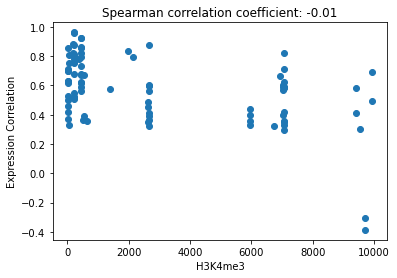

In [20]:
rho, p_value = spearmanr(K562_histone_df.H3K4me3, K562_histone_df.bivalency)
 
plt.scatter(K562_histone_df.bivalency, K562_histone_df.Correlation)
plt.title("Spearman correlation coefficient: {:.2f}".format(rho))
plt.xlabel("H3K4me3")
plt.ylabel("Expression Correlation")
plt.show()